# Perceptron Model Implementation
### 32513 Advanced Data Analytics Algorithms Machine Learning
#### Daniel Csillag 13200415

The following code builds and evaluates a perceptron model in Python utilising Numpy. The model is tested against the iris dataset in the fully linear separable case, and against the penguins dataset for the non-separable case. The peceptron model constructued distinguishes between 2 classes, labelled -1 and 1 respectively. The report which accompanies this notebook explores the implementation and underlying mathematics in detail.

In [1]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, confusion_matrix
import pandas as pd
import seaborn as sb

In [2]:
class Perceptron:
    def __init__(self, max_iters=1000):
        self.max_iters= max_iters
        self.weights = None
        self.bias = None
        
    def check_model_accuracy_(self, is_pred_corr, y):
        return np.sum(is_pred_corr) / y.size
    
    def predict(self, X):
        return np.sign((X*self.weights).sum(axis=1) + self.bias).astype(np.int)
    
    def fit(self, X, y):
        # Create parameters based on dimensionality of X
        n_samples, n_features = X.shape
        
        # Initialise Weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #Initialise rolling accuracy 
        accu = 0
        optimal_weights = np.zeros(n_features)
        optimal_bias = 0
        perfect = False
        
        # Train the model with specified max_iters, if max iters is reached, store and use best weights
        
        for _ in range(self.max_iters):
            pred = self.predict(X)
            is_pred_corr = y == pred
            is_pred_wrong = np.logical_not(is_pred_corr)
            error_indexes = np.nonzero(is_pred_wrong)[0]
            
            if len(error_indexes) > 0:
                curr_accu = self.check_model_accuracy_(is_pred_corr, y)
                
                if curr_accu > accu:
                    optimal_weights = np.copy(self.weights)
                    optimal_bias = np.copy(self.bias)
                    accu = curr_accu
                    
                next_i = error_indexes[0]
                W_update = X[next_i] * y[next_i]
                self.weights += W_update
                self.bias += y[next_i]
                
            else:
                perfect = True
                break
        # If model does not achieve perfect accuracy, revert model weights back to best accuracy 
        if not perfect:
            self.weights = optimal_weights
            self.bias = optimal_bias

With the model created, evaluate its results on a two class classification of the Iris dataset.

In [3]:
from sklearn.datasets import load_iris
db = load_iris()
X_total, y_total = db['data'], db['target']

c0 = 0
c1 = 1

sub_index = np.logical_or(y_total == c0, y_total == c1)
X = X_total[sub_index]
y = y_total[sub_index]

y[y==c0] = -1
y[y==c1] = 1

# Split into Training and testing samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [4]:
model = Perceptron()

model.fit(X_train, y_train)

In [5]:
pred = model.predict(X_test)

print(f"Accuracy score {accuracy_score(y_test, pred)}")
confusion_matrix(y_test, pred)

Accuracy score 1.0


array([[16,  0],
       [ 0, 14]], dtype=int64)

The perceptron is able to perfectly classify between the two classes in the case of our iris data, due to its linear separability. 

### Penguins dataset.

To further validate the perceptron model constructed, its predictions are further validated on a second dataset. The dataset chosen is the penguins dataset, which can be preloaded via the seaborn library is a great candidate as data within in it is not necessarily perfectly linearly separable. This allows for the evaluation of the models ability to select best fit model weights in the case of an imperfect separation.

Our model will use 4 attributes, to evaluate determine whether or not a penguin belongs to the Adelie or Gentoo Population:
- Bill Length (mm)
- Bill Depth (mm)
- Flipper Length (mm)
- Body Mass (grams)

First load, process and visiualise the dataset using the pandas & seaborn libraries.

In [6]:
df = sb.load_dataset("penguins")
df.dropna(inplace=True)
print(df.shape)
print(df.species.value_counts())
df.head()

(333, 7)
Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [7]:
# Remove the Chinstrap penguins to create a two class data structure
df = df[(df.species != 'Chinstrap')]
df.species.value_counts()

Adelie    146
Gentoo    119
Name: species, dtype: int64

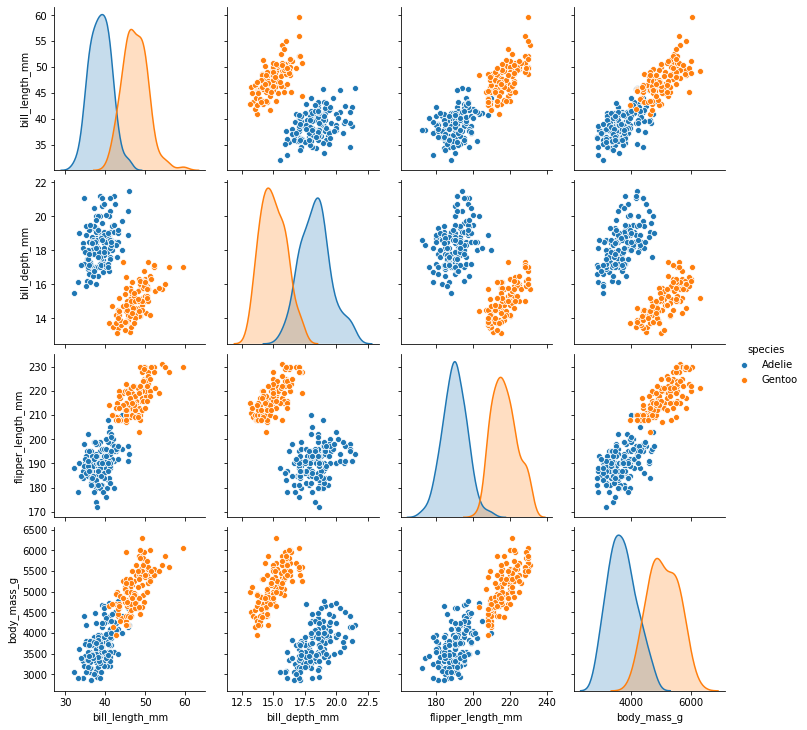

In [8]:
# Visualise the data points by species
sb.pairplot(df, hue='species');

As seen in flipper length case, there are several data points which overlap into other categories and so a perceptron based on its linearly separable criteria will not be able to achieve a 100% classification accuracy with this dataset. 

Now we perform a train_test_split on the data and give appropriate y labels of 1 ("Adelie") and -1 ("Gentoo") to the dataset.

In [9]:
c0 = "Adelie"
c1 = "Gentoo"

X = np.array(df[['bill_length_mm','bill_depth_mm','body_mass_g','flipper_length_mm']])
y = np.array(df['species'])

y[y==c0] = -1
y[y==c1] = 1

y = y.astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Preview training data
print(np.unique(y_train, return_counts=True))
X_train[:10]

(array([-1,  1]), array([102,  83], dtype=int64))


array([[  39.5,   16.7, 3250. ,  178. ],
       [  49.4,   15.8, 4925. ,  216. ],
       [  35.6,   17.5, 3175. ,  191. ],
       [  43.2,   19. , 4775. ,  197. ],
       [  52.5,   15.6, 5450. ,  221. ],
       [  42. ,   19.5, 4050. ,  200. ],
       [  48.8,   16.2, 6000. ,  222. ],
       [  48.5,   15. , 4850. ,  219. ],
       [  50.5,   15.2, 5000. ,  216. ],
       [  36. ,   18.5, 3100. ,  186. ]])

Build the perceptron model and fit it to the penguin dataset.

In [10]:
p_model = Perceptron()
p_model.fit(X_train, y_train)

Get prediction and accuracy for the model.

In [11]:
pred = p_model.predict(X_test)

print(f"Accuracy score {accuracy_score(y_test, pred)}")
confusion_matrix(y_test, pred)

Accuracy score 0.8375


array([[35,  9],
       [ 4, 32]], dtype=int64)

The model returns an an accuracy score of 83.75%, with roughly an even split between true negatives and false positives. 
This a good performance result given the non-linear separability of the data. 

To attempt to visualise the decision boundry of the perceptron, lets create a model with only two dimensions using a combination of body mass & flipper length, as these data points are non-linear and evaluate the classifiers performance.

In [12]:
X2 = np.array(df[['body_mass_g','flipper_length_mm']])
y2 = np.array(df['species'])

y2[y2==c0] = -1
y2[y2==c1] = 1

y2 = y2.astype(np.int32)

# Create the same train test split with random_state.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=30)

In [13]:
p2_model = Perceptron()
p2_model.fit(X2_train, y2_train)

Evaluate the two dimensional models accuracy

In [14]:
pred2 = p2_model.predict(X2_test)

print(f"Accuracy score {accuracy_score(y2_test, pred2)}")
confusion_matrix(y2_test, pred2)

Accuracy score 0.8375


array([[35,  9],
       [ 4, 32]], dtype=int64)

Create a function to visualise the output of the perceptron model.

In [15]:
def vizzPerceptron(x, y, model, title):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(x[:,0], x[:,1], marker='o', c=y)

    x0_1 = np.amin(x[:, 0])
    x0_2 = np.amax(x[:, 0])

    x1_1 = (-model.weights[0] * x0_1 + model.bias) / model.weights[1]
    x1_2 = (-model.weights[0] * x0_2 + model.bias) / model.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(x[:,1])
    ymax = np.amax(x[:,1])

    ax.set_ylim([ymin -3, ymax +3])
    ax.set_title(title)

    plt.show()

Visualise the output for both training and test set.

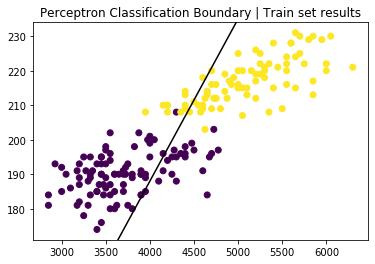

In [16]:
vizzPerceptron(X2_train, y2_train, p2_model, title="Perceptron Classification Boundary | Train set results")

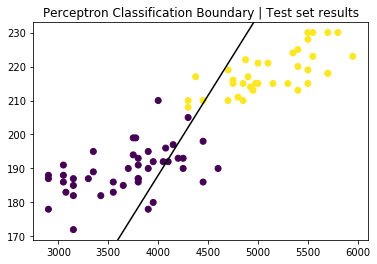

In [17]:
vizzPerceptron(X2_test, y2_test, p2_model, title="Perceptron Classification Boundary | Test set results")

For a final evaluation step, increase max iterations to 10,000 to see if performance gains can be made. In the case of this dataset,

In [18]:
p2_model = Perceptron(max_iters=10000)
p2_model.fit(X2_train, y2_train)

In [19]:
pred2 = p2_model.predict(X2_test)

print(f"Accuracy score {accuracy_score(y2_test, pred2)}")
confusion_matrix(y2_test, pred2)

Accuracy score 0.8375


array([[35,  9],
       [ 4, 32]], dtype=int64)